(functions)=
```{raw} jupyter
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# Functions

```{index} single: Python; User-defined functions
```

## Overview

Functions are an extremely useful construct provided by almost all programming.

We have already met several functions, such as

* the `sqrt()` function from NumPy and
* the built-in `print()` function

In this lecture we'll 

1. treat functions systematically and cover syntax and use-cases, and
2. learn to do is build our own user-defined functions.

We will use the following imports.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Function Basics

A function is a named section of a program that implements a specific task.

Many functions exist already and we can use them as is.

First we review these functions and then discuss how we can build our own.

### Built-In Functions

Python has a number of **built-in** functions that are available without `import`.

We have already met some

In [2]:
max(19, 20)

20

In [3]:
print('foobar')

foobar


In [4]:
str(22)

'22'

In [5]:
type(22)

int

The full list of Python built-ins is [here](https://docs.python.org/library/functions.html).


### Third Party Functions

If the built-in functions don't cover what we need, we either need to import
functions or create our own.

Examples of importing and using functions were given in the {doc}`previous lecture <python_by_example>`

Here's another one, which tests whether a given year is a leap year:

In [6]:
import calendar
calendar.isleap(2024)

True

## Defining Functions

In many instances it's useful to be able to define our own functions.

Let's start by discussing how it's done.

### Basic Syntax

Here's a very simple Python function, that implements the mathematical function $f(x) = 2 x + 1$

In [7]:
def f(x):
    return 2 * x + 1

Now that we've defined this function, let's *call* it and check whether it does what we expect:

In [8]:
f(1)   

3

In [9]:
f(10)

21

Here's a longer function, that computes the absolute value of a given number.

(Such a function already exists as a built-in, but let's write our own for the
exercise.)

In [10]:
def new_abs_function(x):
    if x < 0:
        abs_value = -x
    else:
        abs_value = x
    return abs_value

Let's review the syntax here.

* `def` is a Python keyword used to start function definitions.
* `def new_abs_function(x):` indicates that the function is called `new_abs_function` and that it has a single argument `x`.
* The indented code is a code block called the *function body*.
* The `return` keyword indicates that `abs_value` is the object that should be returned to the calling code.

This whole function definition is read by the Python interpreter and stored in memory.

Let's call it to check that it works:

In [11]:
print(new_abs_function(3))
print(new_abs_function(-3))

3
3


Note that a function can have arbitrarily many `return` statements (including zero).

Execution of the function terminates when the first return is hit, allowing
code like the following example

In [12]:
def f(x):
    if x < 0:
        return 'negative'
    return 'nonnegative'

(Writing functions with multiple return statements is typically discouraged, as
it can make logic hard to follow.)

Functions without a return statement automatically return the special Python object `None`.

(pos_args)=
### Keyword Arguments

```{index} single: Python; keyword arguments
```

In a {ref}`previous lecture <python_by_example>`, you came across the statement

```{code-block} python3
:class: no-execute

plt.plot(x, 'b-', label="white noise")
```

In this call to Matplotlib's `plot` function, notice that the last argument is passed in `name=argument` syntax.

This is called a *keyword argument*, with `label` being the keyword.

Non-keyword arguments are called *positional arguments*, since their meaning
is determined by order

* `plot(x, 'b-')` differs from `plot('b-', x)`

Keyword arguments are particularly useful when a function has a lot of arguments, in which case it's hard to remember the right order.

You can adopt keyword arguments in user-defined functions with no difficulty.

The next example illustrates the syntax

In [13]:
def f(x, a=1, b=1):
    return a + b * x

The keyword argument values we supplied in the definition of `f` become the default values

In [14]:
f(2)

3

They can be modified as follows

In [15]:
f(2, a=4, b=5)

14

### The Flexibility of Python Functions

As we discussed in the {ref}`previous lecture <python_by_example>`, Python functions are very flexible.

In particular

* Any number of functions can be defined in a given file.
* Functions can be (and often are) defined inside other functions.
* Any object can be passed to a function as an argument, including other functions.
* A function can return any kind of object, including functions.

We will give examples of how straightforward it is to pass a function to
a function in the following sections.

### One-Line Functions: `lambda`

```{index} single: Python; lambda functions
```

The `lambda` keyword is used to create simple functions on one line.

For example, the definitions

In [16]:
def f(x):
    return x**3

and

In [17]:
f = lambda x: x**3

are entirely equivalent.

To see why `lambda` is useful, suppose that we want to calculate $\int_0^2 x^3 dx$ (and have forgotten our high-school calculus).

The SciPy library has a function called `quad` that will do this calculation for us.

The syntax of the `quad` function is `quad(f, a, b)` where `f` is a function and `a` and `b` are numbers.

To create the function $f(x) = x^3$ we can use `lambda` as follows

In [18]:
from scipy.integrate import quad

quad(lambda x: x**3, 0, 2)

(4.0, 4.440892098500626e-14)

Here the function created by `lambda` is said to be *anonymous* because it was never given a name.


### Why Write Functions?

User-defined functions are important for improving the clarity of your code by

* separating different strands of logic
* facilitating code reuse

(Writing the same thing twice is [almost always a bad idea](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself))

We will say more about this {doc}`later <writing_good_code>`.

## Applications

### Random Draws

Consider again this code from the {doc}`previous lecture <python_by_example>`

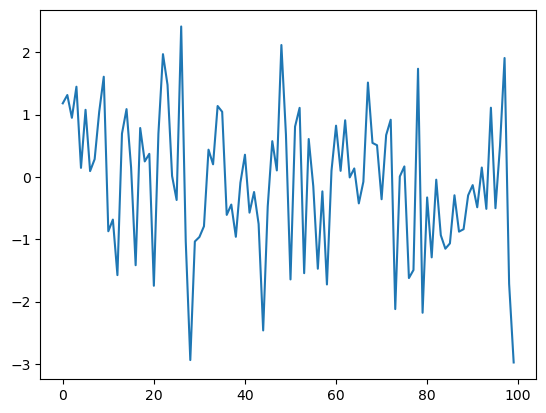

In [19]:
ts_length = 100
ϵ_values = []   # empty list

for i in range(ts_length):
    e = np.random.randn()
    ϵ_values.append(e)

plt.plot(ϵ_values)
plt.show()

We will break this program into two parts:

1. A user-defined function that generates a list of random variables.
1. The main part of the program that
    1. calls this function to get data
    1. plots the data

This is accomplished in the next program

(funcloopprog)=

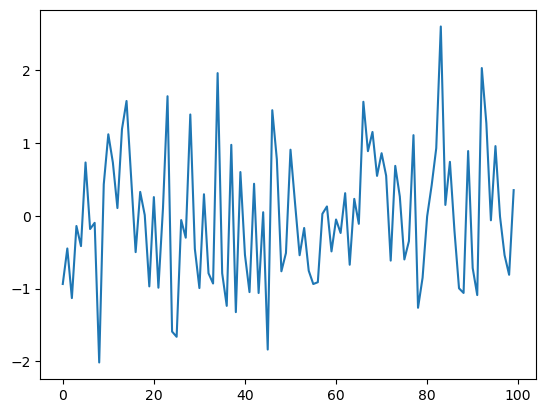

In [20]:
def generate_data(n):
    ϵ_values = []
    for i in range(n):
        e = np.random.randn()
        ϵ_values.append(e)
    return ϵ_values

data = generate_data(100)
plt.plot(data)
plt.show()

When the interpreter gets to the expression `generate_data(100)`, it executes the function body with `n` set equal to 100.

The net result is that the name `data` is *bound* to the list `ϵ_values` returned by the function.

### Adding Conditions

```{index} single: Python; Conditions
```

Our function `generate_data()` is rather limited.

Let's make it slightly more useful by giving it the ability to return either standard normals or uniform random variables on $(0, 1)$ as required.

This is achieved in the next piece of code.

(funcloopprog2)=

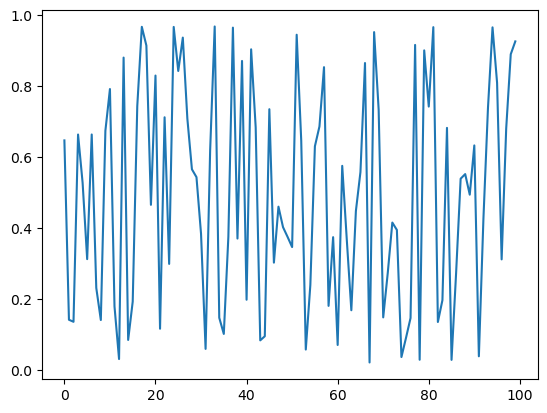

In [21]:
def generate_data(n, generator_type):
    ϵ_values = []
    for i in range(n):
        if generator_type == 'U':
            e = np.random.uniform(0, 1)
        else:
            e = np.random.randn()
        ϵ_values.append(e)
    return ϵ_values

data = generate_data(100, 'U')
plt.plot(data)
plt.show()

Hopefully, the syntax of the if/else clause is self-explanatory, with indentation again delimiting the extent of the code blocks.

Notes

* We are passing the argument `U` as a string, which is why we write it as `'U'`.
* Notice that equality is tested with the `==` syntax, not `=`.
    * For example, the statement `a = 10` assigns the name `a` to the value `10`.
    * The expression `a == 10` evaluates to either `True` or `False`, depending on the value of `a`.

Now, there are several ways that we can simplify the code above.

For example, we can get rid of the conditionals all together by just passing the desired generator type *as a function*.

To understand this, consider the following version.

(test_program_6)=

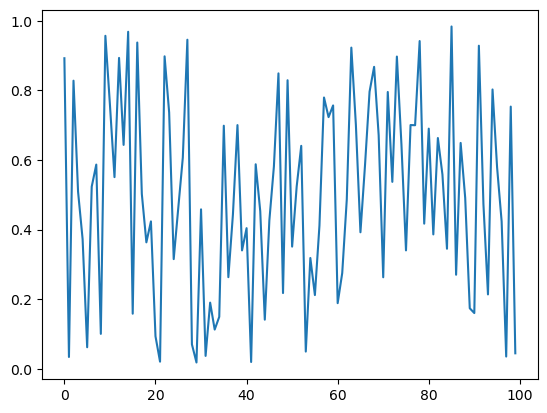

In [22]:
def generate_data(n, generator_type):
    ϵ_values = []
    for i in range(n):
        e = generator_type()
        ϵ_values.append(e)
    return ϵ_values

data = generate_data(100, np.random.uniform)
plt.plot(data)
plt.show()

Now, when we call the function `generate_data()`, we pass `np.random.uniform`
as the second argument.

This object is a *function*.

When the function call  `generate_data(100, np.random.uniform)` is executed, Python runs the function code block with `n` equal to 100 and the name `generator_type` "bound" to the function `np.random.uniform`.

* While these lines are executed, the names `generator_type` and `np.random.uniform` are "synonyms", and can be used in identical ways.

This principle works more generally---for example, consider the following piece of code

In [23]:
max(7, 2, 4)   # max() is a built-in Python function

7

In [24]:
m = max
m(7, 2, 4)

7

Here we created another name for the built-in function `max()`, which could
then be used in identical ways.

In the context of our program, the ability to bind new names to functions
means that there is no problem *passing a function as an argument to another
function*---as we did above.


(recursive_functions)=
## Recursive Function Calls (Advanced)

```{index} single: Python; Recursion
```

This is an advanced topic that you should feel free to skip.

At the same time, it's a neat idea that you should learn it at some stage of
your programming career.

Basically, a recursive function is a function that calls itself.

For example, consider the problem of computing $x_t$ for some t when

```{math}
:label: xseqdoub

x_{t+1} = 2 x_t, \quad x_0 = 1
```

Obviously the answer is $2^t$.

We can compute this easily enough with a loop

In [25]:
def x_loop(t):
    x = 1
    for i in range(t):
        x = 2 * x
    return x

We can also use a recursive solution, as follows

In [26]:
def x(t):
    if t == 0:
        return 1
    else:
        return 2 * x(t-1)

What happens here is that each successive call uses it's own *frame* in the *stack*

* a frame is where the local variables of a given function call are held
* stack is memory used to process function calls
  * a First In Last Out (FILO) queue

This example is somewhat contrived, since the first (iterative) solution would usually be preferred to the recursive solution.

We'll meet less contrived applications of recursion later on.


(factorial_exercise)=
## Exercises

```{exercise-start}
:label: func_ex1
```

Recall that $n!$ is read as "$n$ factorial" and defined as
$n! = n \times (n - 1) \times \cdots \times 2 \times 1$.

We will only consider $n$ as a positive integer here.

There are functions to compute this in various modules, but let's
write our own version as an exercise.

In particular, write a function `factorial` such that `factorial(n)` returns $n!$
for any positive integer $n$.

```{exercise-end}
```


```{solution-start} func_ex1
:class: dropdown
```

Here's one solution:

In [27]:
def factorial(n):
    k = 1
    for i in range(n):
        k = k * (i + 1)
    return k

factorial(4)

24

```{solution-end}
```


```{exercise-start}
:label: func_ex2
```

The [binomial random variable](https://en.wikipedia.org/wiki/Binomial_distribution) $Y \sim Bin(n, p)$ represents the number of successes in $n$ binary trials, where each trial succeeds with probability $p$.

Without any import besides `from numpy.random import uniform`, write a function
`binomial_rv` such that `binomial_rv(n, p)` generates one draw of $Y$.

```{hint}
:class: dropdown

If $U$ is uniform on $(0, 1)$ and $p \in (0,1)$, then the expression `U < p` evaluates to `True` with probability $p$.
```

```{exercise-end}
```


```{solution-start} func_ex2
:class: dropdown
```

Here is one solution:

In [28]:
from numpy.random import uniform

def binomial_rv(n, p):
    count = 0
    for i in range(n):
        U = uniform()
        if U < p:
            count = count + 1    # Or count += 1
    return count

binomial_rv(10, 0.5)

7

```{solution-end}
```


```{exercise-start}
:label: func_ex3
```

First, write a function that returns one realization of the following random device

1. Flip an unbiased coin 10 times.
1. If a head occurs `k` or more times consecutively within this sequence at least once, pay one dollar.
1. If not, pay nothing.

Second, write another function that does the same task except that the second rule of the above random device becomes

- If a head occurs `k` or more times within this sequence, pay one dollar.

Use no import besides `from numpy.random import uniform`.

```{exercise-end}
```

```{solution-start} func_ex3
:class: dropdown
```

Here's a function for the first random device.

In [29]:
from numpy.random import uniform

def draw(k):  # pays if k consecutive successes in a sequence

    payoff = 0
    count = 0

    for i in range(10):
        U = uniform()
        count = count + 1 if U < 0.5 else 0
        print(count)    # print counts for clarity
        if count == k:
            payoff = 1

    return payoff

draw(3)

1
2
3
0
0
0
0
0
0
0


1

Here's another function for the second random device.

In [30]:
def draw_new(k):  # pays if k successes in a sequence

    payoff = 0
    count = 0

    for i in range(10):
        U = uniform()
        count = count + ( 1 if U < 0.5 else 0 )
        print(count)
        if count == k:
            payoff = 1

    return payoff

draw_new(3)

0
0
0
0
1
2
3
4
4
5


1

```{solution-end}
```


## Advanced Exercises

In the following exercises, we will write recursive functions together.


```{exercise-start}
:label: func_ex4
```

The Fibonacci numbers are defined by

```{math}
:label: fib

x_{t+1} = x_t + x_{t-1}, \quad x_0 = 0, \; x_1 = 1
```

The first few numbers in the sequence are $0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55$.

Write a function to recursively compute the $t$-th Fibonacci number for any $t$.

```{exercise-end}
```

```{solution-start} func_ex4
:class: dropdown
```

Here's the standard solution

In [31]:
def x(t):
    if t == 0:
        return 0
    if t == 1:
        return 1
    else:
        return x(t-1) + x(t-2)

Let's test it

In [32]:
print([x(i) for i in range(10)])

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


```{solution-end}
```

```{exercise-start}
:label: func_ex5
```

Rewrite the function `factorial()` in from [Exercise 1](factorial_exercise) using recursion.

```{exercise-end}
```

```{solution-start} func_ex5
:class: dropdown
```

Here's the standard solution

In [33]:
def recursion_factorial(n):
   if n == 1:
       return n
   else:
       return n * recursion_factorial(n-1)

Let's test it

In [34]:
print([recursion_factorial(i) for i in range(1, 10)])

[1, 2, 6, 24, 120, 720, 5040, 40320, 362880]


```{solution-end}
```